In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import hann,flattop,blackman
from scipy import fftpack as fft

## Actividad 1 

In [17]:
# Función de fft con la ventana
def fftwindow (senal,sr):
    F = fft.fft(senal)
    F = 20*np.log10(np.abs(F))
    N = senal.shape[0]

    f  = (np.linspace(0,sr/2,N/2))

    Wh = hann(N)                                       #ventana hanning
    Wf = flattop(N)                                    #ventana flattop
    Wb = blackman(N)                                   #ventana blackman

    ## Calculando FFT con las tres ventanas
    FWh = fft.fft(senal*Wh)
    FWh = 20*np.log10(np.abs(FWh))
    FWf = fft.fft(senal*Wf)
    FWf = 20*np.log10(np.abs(FWf))
    FWb = fft.fft(senal*Wb)
    FWb = 20*np.log10(np.abs(FWb))

    return FWh,FWf,FWb,F,f,N


In [19]:
## Generando la señal
sr = 320
L = 5                                               #Eje de tiempo
G = []                                              #eje de frecuencias
G.append(12)                                        #frecuencia 5
G.append(17.5)     
t = np.linspace(0,L,L*sr)                           #Genereando eje de timepo
t = t[:,np.newaxis]
G = np.array(G)[np.newaxis]
s = (2*np.pi*t*G)
s = np.cos(s)
s = s.sum(axis=1)




C:\Users\Alex XD\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


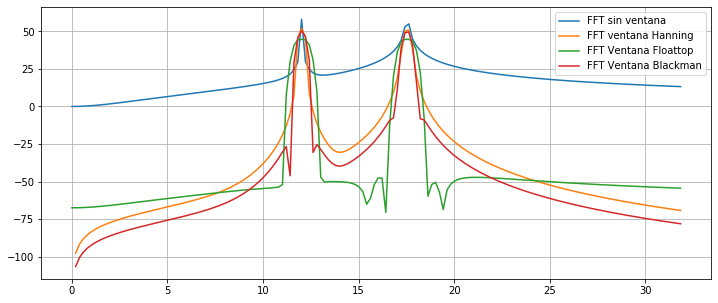

In [45]:
# llamando a la función
Wh,Wf,Wb,F,f,N = fftwindow(s,sr)                    
## Graficando las ventanas
plt.figure(figsize = (12,5))
plt.plot(f [:N//10],F[:N//10])
plt.plot(f[1:N//10],Wh[1:N//10])
plt.plot(f[:N//10],Wf[:N//10])
plt.plot(f[1:N//10],Wb[1:N//10])
plt.grid (True)
plt.legend(['FFT sin ventana','FFT ventana Hanning','FFT Ventana Floattop','FFT Ventana Blackman'])
